In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [3]:
df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


The dataset is used to classify iris flowers into one of three species based on their physical measurements(sizes).

**Understanding the Variables**

1. Id - This is the index of the dataset. We don't need this variable as Pandas already assigns index while creating the dataframe
2. SepalLengthCm - Sepal Length (in cm)
3. SepalWidthCm - Sepal Width (in cm)
4. PetalLengthCm - Petal Length (in cm)
5. PetalWidthCm - Petal Width (in cm)
6. Species - This is the target variable. It has three values:
    * Iris-setosa
    * Iris-versicolor
    * Iris-virginica

In [7]:
df.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
# Drop the Id column
df.drop(["Id"], axis = 1, inplace = True)

In [9]:
# Edit the names of the values of the Species column
df["Species"] = df["Species"].str.replace("Iris-", "")

In [10]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


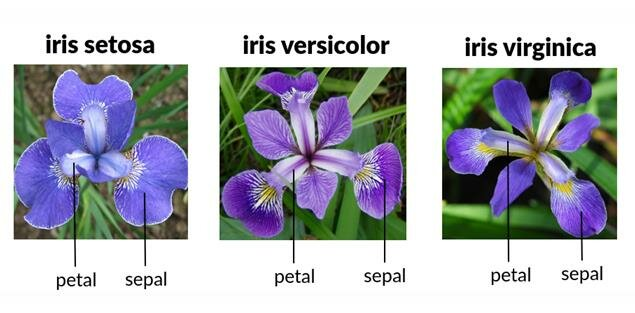

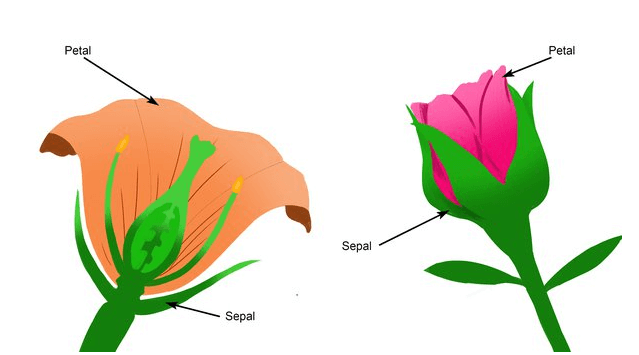

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We quickly note that there are no null values

**EDA**

*Let's first work on the dataset with a pairplot to see the relationship between any 2 variables*

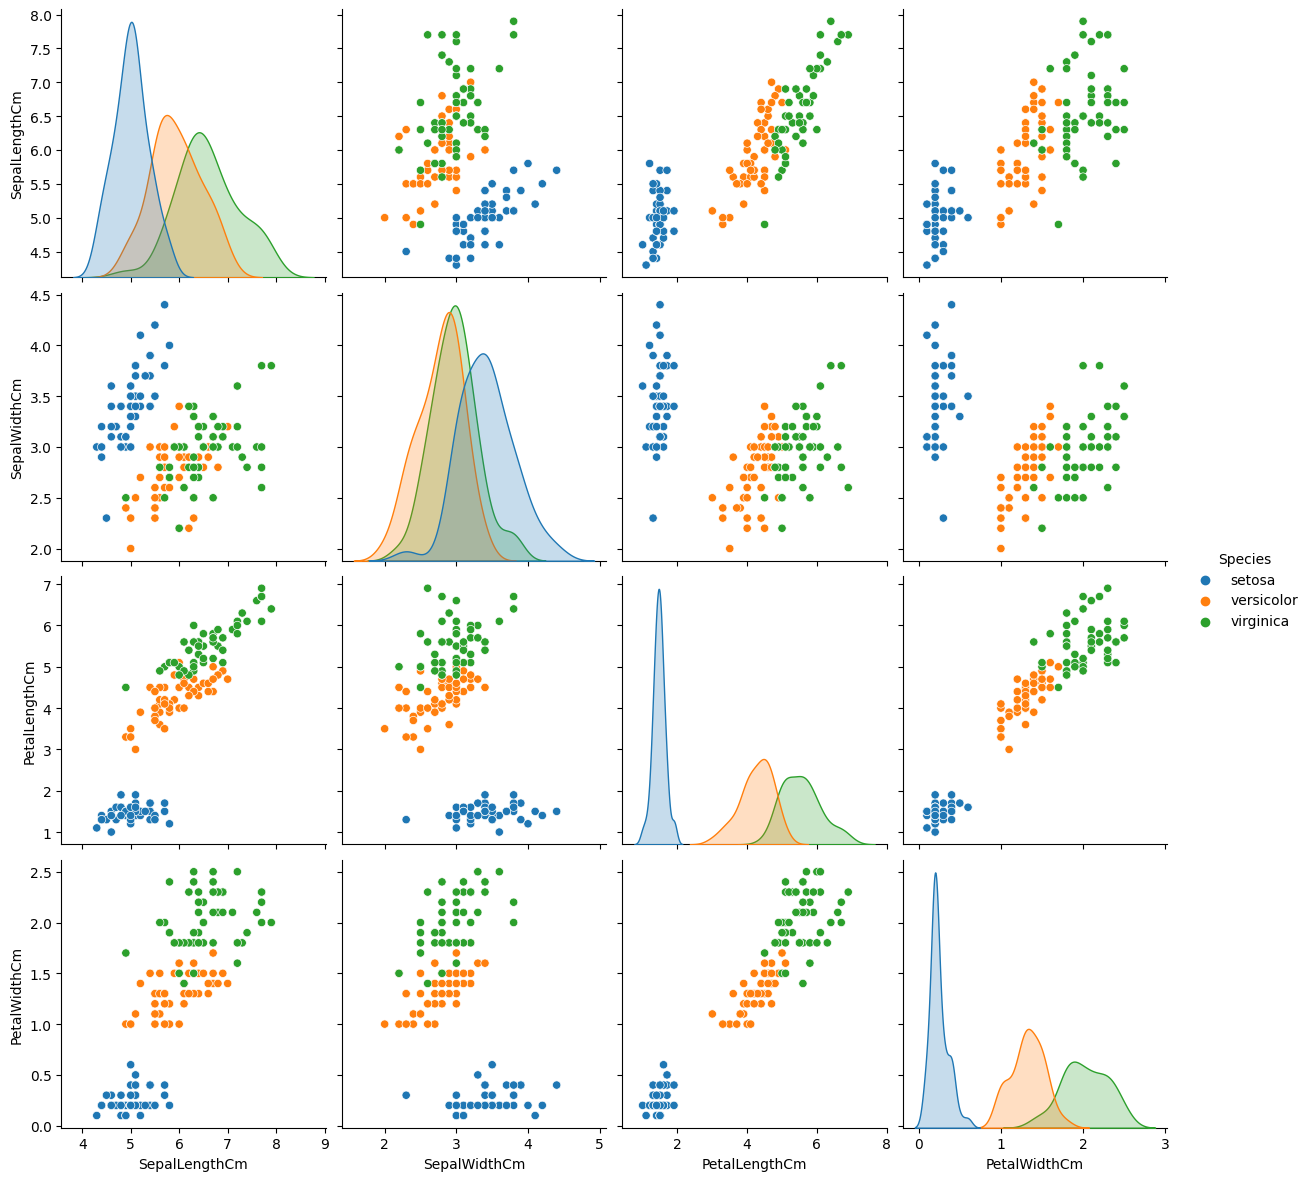

In [17]:
sns.pairplot(data = df, hue = "Species", height = 3)

In [18]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Let's convert the target variable **Species** to numerical data type in order to study correlation using a heatmap

In [20]:
df["Species_Num"] = df["Species"]

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [22]:
df["Species_Num"] = df["Species_Num"].str.replace("setosa", "1")
df["Species_Num"] = df["Species_Num"].str.replace("veriscolor", "2")
df["Species_Num"] = df["Species_Num"].str.replace("virginica", "3")

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


Let's now convert *Species_Num* to integer

In [26]:
# Map Categorical Values to Numbers
df["Species_Num"] = df["Species_Num"].astype("category").cat.codes

In [27]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


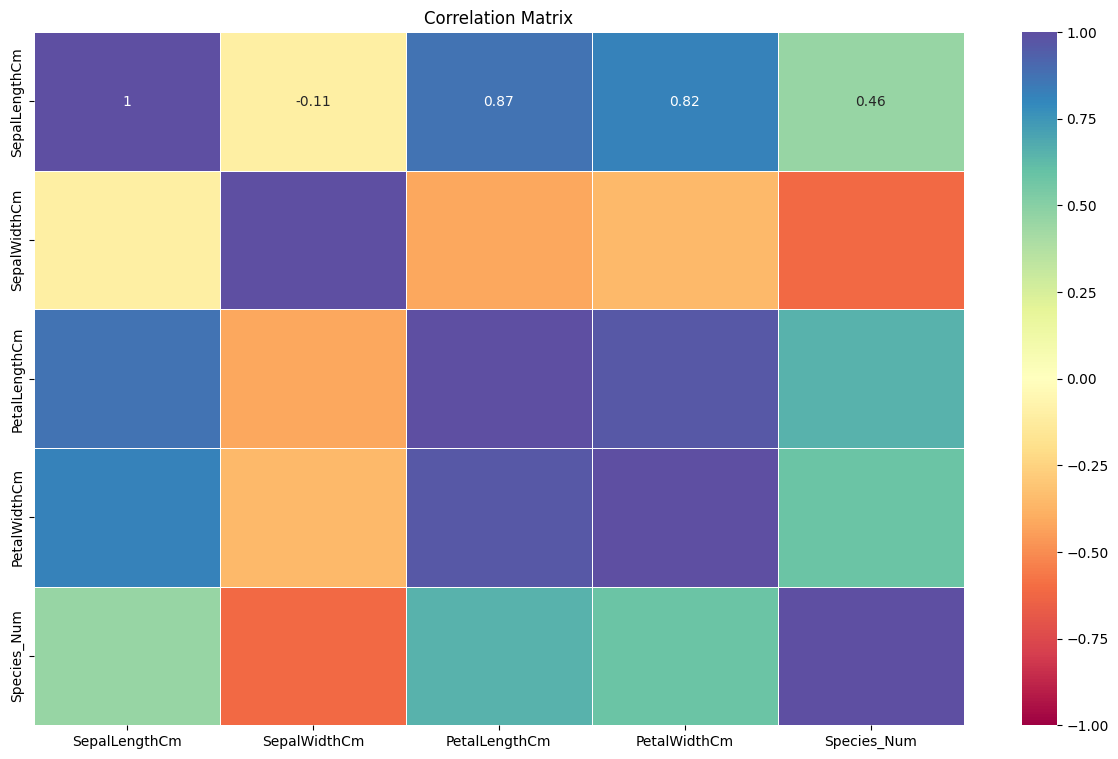

In [29]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 9))
sns.heatmap(df_numeric.corr(), annot=True, linewidth=0.5, cmap="Spectral", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [30]:
corr = df_numeric.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Num
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.580749
Species_Num,0.460039,-0.612165,0.649101,0.580749,1.000000


**Key Observations**
- PetalLengthCm and PetalWidthCm have the strongest positive correlations with Species_Num, meaning they are likely important predictors for species classification.
- SepalWidthCm has a strong negative correlation (-0.6122), meaning as SepalWidthCm increases, Species_Num tends to decrease.
- SepalLengthCm has a weaker correlation (0.4600) but may still contribute some predictive power.

*Multicollinearity check for the independent variables with Correlation Matrix with Thresholds method:*

In [33]:
# create a new df for the independent variables
df_independent = df.drop(columns=["Species_Num", "Species"])

In [34]:
df_independent.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


*Correlation matrix*

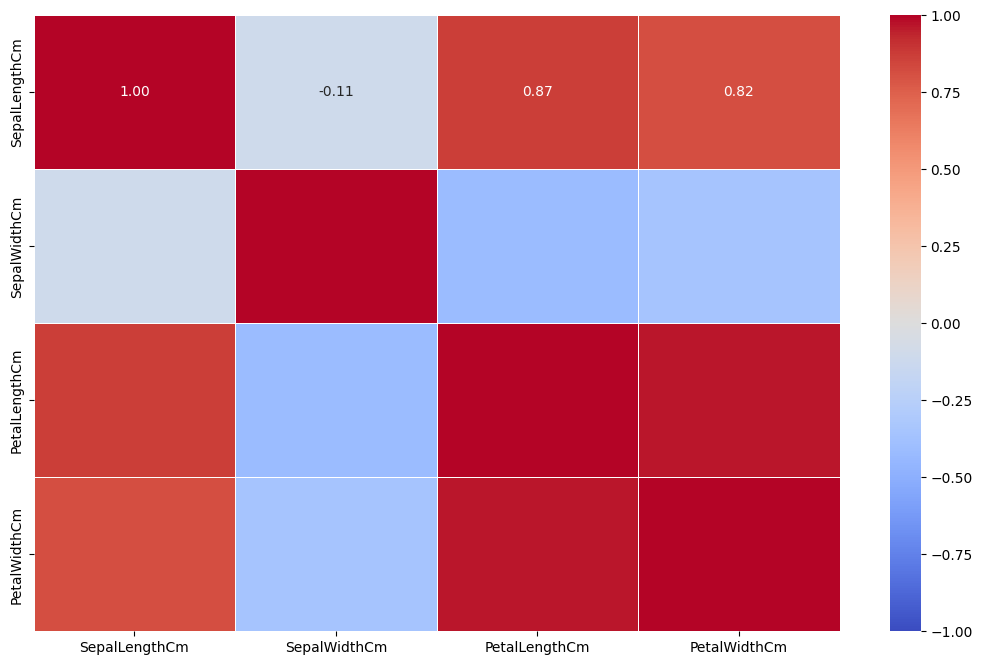

In [36]:
plt.figure(figsize=(13, 8))
corr_matrix = df_independent.corr()
sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidth=0.5, cmap="coolwarm", vmin = -1, vmax = 1)
plt.show()

In [37]:
corr_independent = df_independent.corr()
corr_independent

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [38]:
corr_independent_abs = df_independent.corr().abs()
corr_independent_abs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.109369,0.871754,0.817954
SepalWidthCm,0.109369,1.000000,0.420516,0.356544
PetalLengthCm,0.871754,0.420516,1.000000,0.962757
PetalWidthCm,0.817954,0.356544,0.962757,1.000000


In [39]:
# Select upper triangle of correlation matrix
upper = corr_independent_abs.where(np.triu(np.ones(corr_independent_abs.shape), k=1).astype(bool))

In [40]:
# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [41]:
print("Highly correlated variables:", to_drop)

Highly correlated variables: ['PetalLengthCm', 'PetalWidthCm']


We can impose a lower cost on the model by removing either of the above highly correlated variables
I'd go for **PetalWidthCm** simply cause it has a lower correlation to the target varaible as compared to **PetalLengthCm**
We are also done with the *Species_Num* variable so we can drop that too

In [43]:
columns_to_drop = ["PetalWidthCm", "Species_Num"]
df.drop(columns_to_drop, axis = 1, inplace = True)

In [44]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,Species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa
5,5.4,3.9,1.7,setosa
6,4.6,3.4,1.4,setosa
7,5.0,3.4,1.5,setosa
8,4.4,2.9,1.4,setosa
9,4.9,3.1,1.5,setosa


- Decision tree algorithms do not require standardization (or normalization) of features.
- Unlike algorithms that rely on distance calculations (such as KNN, K-Means, or SVM), decision trees make splits based on feature values without being affected by their scale.
- Therefore, we will just proceed to modeling

**Decision Tree Modeling**

In [47]:
# X is all variables except target variable, which is y
X = df.drop("Species", axis=1)
y = df["Species"]

In [48]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [49]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
#random_state=42: This parameter ensures reproducibility. By setting a seed value (42 in this case), the split will be the same every time you run the code, allowing for consistent results.

In [52]:
#Visualize the divisions
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (112, 3) (112,)
Test set: (38, 3) (38,)


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt_model = DecisionTreeClassifier()

In [55]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
# Make predictions on the test data
y_pred = dt_model.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred))

Accuracy Score:  0.9473684210526315


That's high accuracy! Doubt it? Let's perform some cross validation

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
# Perform k-fold cross-validation on the decision tree model (dt_model) using the training data (X_train, y_train), with cv=10 indicating 10-fold cross-validation.
cv_scores = cross_val_score(estimator = dt_model, X = X_train, y = y_train, cv = 10)
# Calculate the average accuracy across all 10 validation runs.
cv_scores.mean()

0.9106060606060604

- This gives a more reliable estimate of the model's generalization performance.
- The lower accuracy (~89.24%) suggests that the model's performance varies depending on the data split.

In [63]:
cv_scores

array([0.91666667, 0.91666667, 0.90909091, 1.        , 0.72727273,
       0.81818182, 1.        , 1.        , 0.90909091, 0.90909091])

From the above scores, we can see 100% scores in some models but we can also see some having as low as ~63.6% accuracy scores

*Evaluate the **confussion matrix** metric*

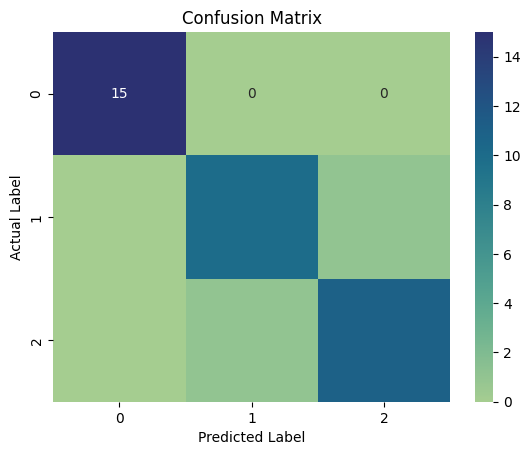

In [66]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "crest")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [67]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


**Interpretation**

- Rows represent the Actual Classes while Columns represent the Predicted Classes
- First row [15,0,0]:
  - 15 instances of class 0 were correctly predicted as class 0.
  - 0 instances of class 0 were misclassified as class 1.
  - 0 instances of class 0 were misclassified as class 2.
- Second row [0,11,0]:
  - 0 instances of class 1 were misclassified as class 0.
  - 11 instances of class 1 were correctly predicted as class 1.
  - 1 instance of class 1 were misclassified as class 2.
- Third row [0,1,11]:
  - 0 instances of class 2 were misclassified as class 0.
  - 1 instance of class 2 was misclassified as class 1.
  - 11 instances of class 2 were correctly predicted as class 2.

*Evaluate the **Classification_report** metric*

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.91      0.91      0.91        11
   virginica       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



*Interpreting Results*

- Setosa (Class 0):
    - Perfect score (1.00) for precision, recall, and F1-score, meaning it was classified flawlessly (no misclassifications).
- Versicolor (Class 1):
    - Precision = 0.91 → Out of all instances predicted as Versicolor, 91% were actually Versicolor (some false positives exist).
    - Recall = 0.91 → 91% of actual Versicolor instances were correctly classified, meaning some were misclassified as another class (false negatives exist).
    - F1-score = 0.91 → Good balance between precision and recall.
- Virginica (Class 2):
    - Precision = 0.92 → Out of all instances predicted as Virginica, 92% were actually Virginica (some false positives exist).
    - Recall = 0.92 → 92% of actual Virginica were correctly classified, meaning one was misclassified.
    - F1-score = 0.92 → High overall performance.

Accuracy = 95% → Out of all 38 samples, 95% were correctly classified.
- Our model performs exceptionally well with an accuracy of 95%.

**Decision Tree Algorithm**

In [76]:
from sklearn import tree

In [77]:
# Get all independent variables in a list
list(df.columns[:-1])

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']

In [78]:
features = list(df.columns[:-1])
target = ["setosa", "versicolor", "virginica"]

In [79]:
print(features)
print(target)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']
['setosa', 'versicolor', 'virginica']


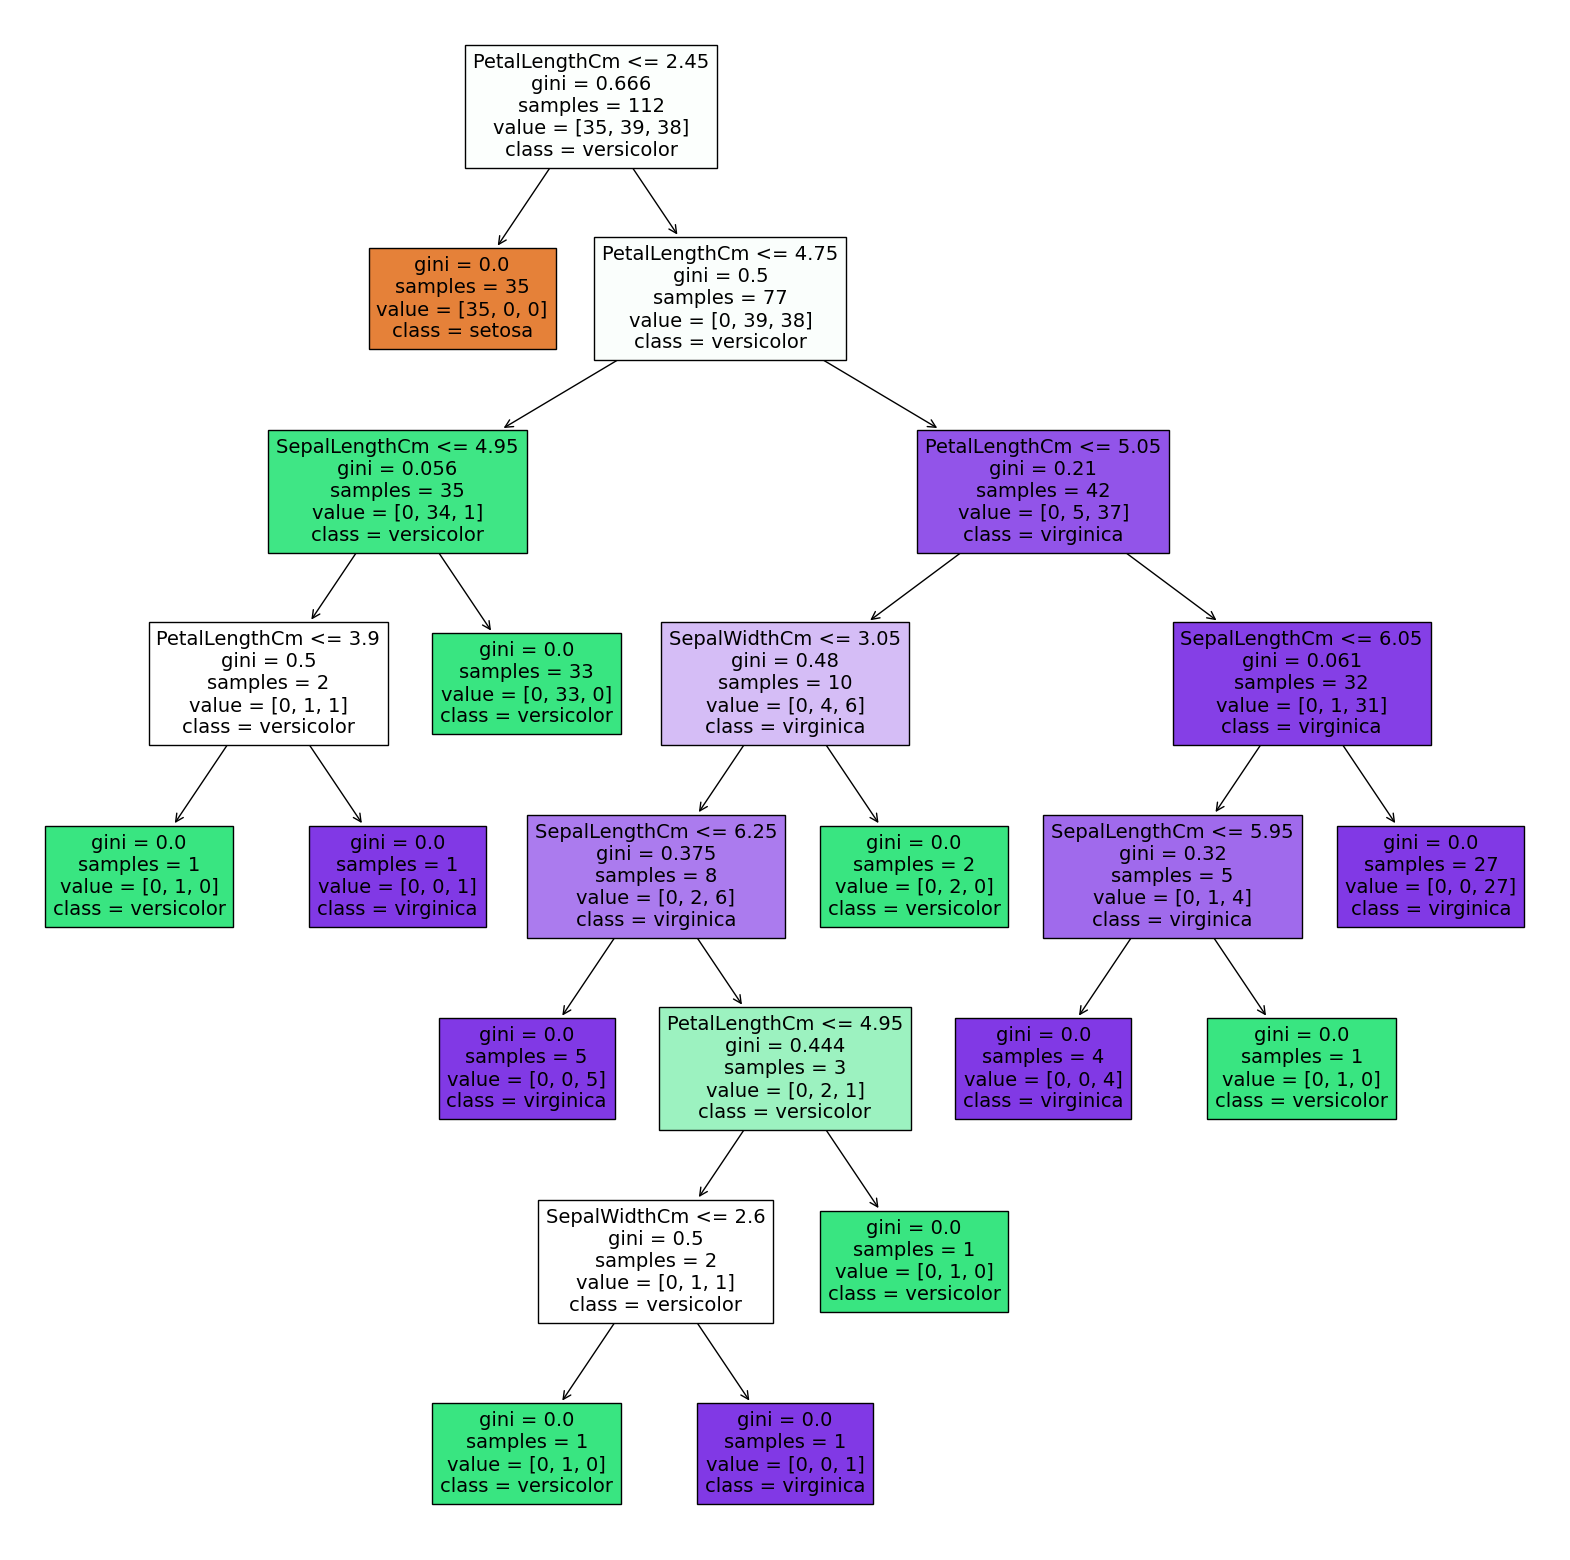

In [80]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_model, filled = True, feature_names = features, class_names = target)

**Hyperparameter Optimization**

In [82]:
#import GridSearchCV method
from sklearn.model_selection import GridSearchCV

In [83]:
dt_model2 = DecisionTreeClassifier()

In [84]:
dt_params = {"criterion" : ["entropy", "gini"],
            "max_depth" : np.arange(2, 14, 2),
            "max_features" : ["auto", "sqrt", "log2"]}

In [85]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid = dt_params, cv = 10)

In [86]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [87]:
#find the best parameter with the best_params_ method
dt_cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}

Create a new model according to these results and check out the results

In [89]:
dt_tuned = DecisionTreeClassifier(criterion = "entropy", max_depth = 12, max_features = "sqrt")

In [90]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt')

In [91]:
y_pred = dt_tuned.predict(X_test)

In [92]:
print("Accuracy Score: ",accuracy_score(y_test, y_pred))

Accuracy Score:  0.9210526315789473


In [93]:
# Perform k-fold cross-validation on the decision tree model (dt_tuned) using the training data (X_train, y_train), with cv=10 indicating 10-fold cross-validation.
cv_scores = cross_val_score(estimator = dt_tuned, X = X_train, y = y_train, cv = 10)
# Calculate the average accuracy across all 10 validation runs.
cv_scores.mean()

0.875

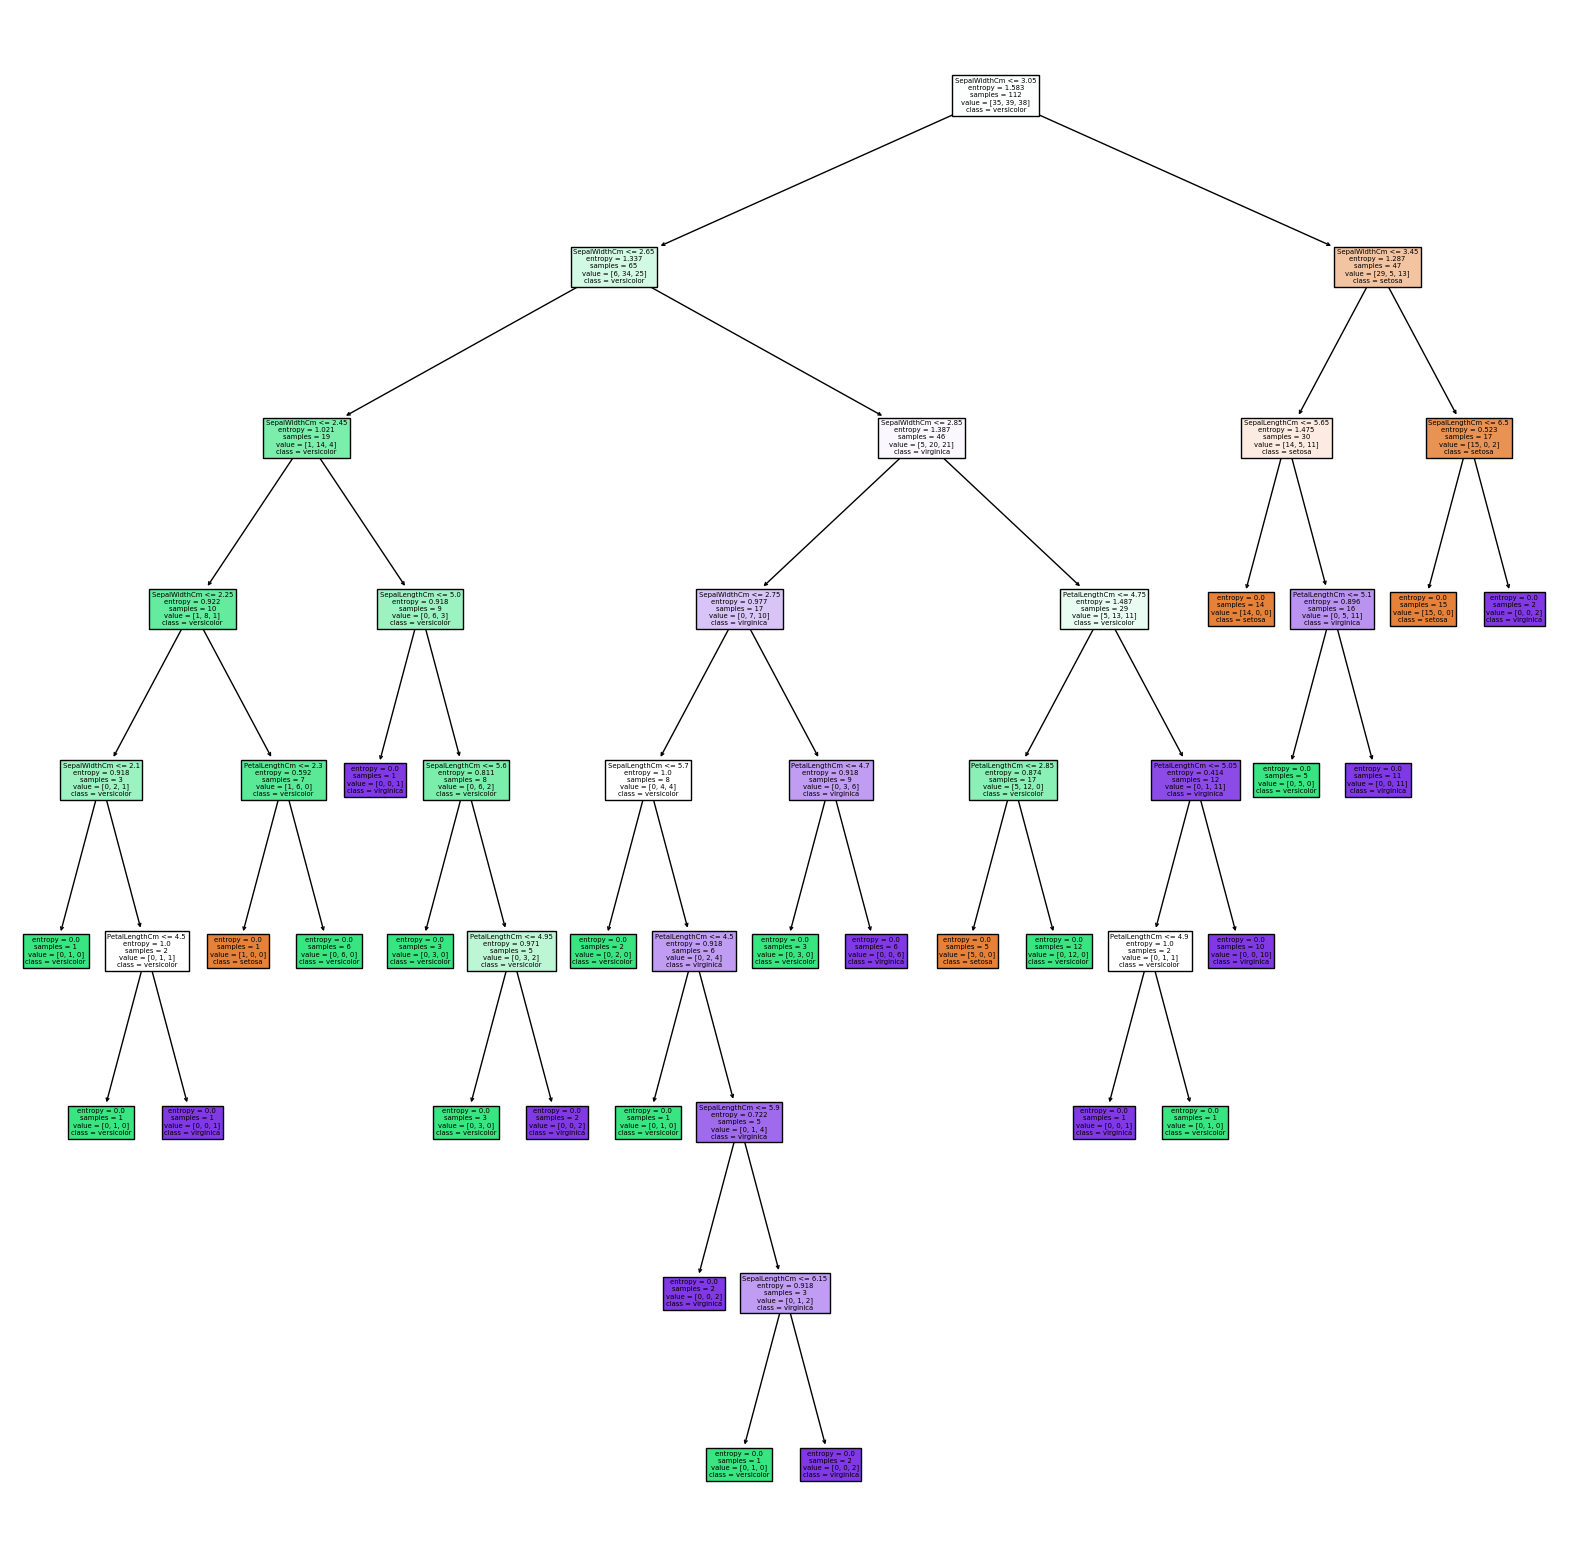

In [94]:
plt.figure(figsize = (20,20))
tree2 = tree.plot_tree(dt_tuned, filled = True, feature_names = features, class_names = target)